In [1]:
import pandas as pd
import sys
from rdkit.Chem import Draw, MolFromSmiles
sys.path.append("../")
from tcad.adme.ADME import LipinskiCalc, PAINS, UnwantedSearcher
import os

In [2]:
data = pd.read_csv("../data/androgen_data.csv")
smiles = data["canonical_smiles"].to_list()

lip_calc = LipinskiCalc(smiles)
lipinski_data = lip_calc.lipinski_table.query("Fulfill == True")
lipinski_data.head()

,Smile,Molecular_weight,Acceptors,Donors,LogP,Fulfill
5,NC(=O)c1ccccc1O,137.047678,2,2,0.4911,True
6,CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C[C@H](C)C4...,386.245710,4,0,4.6552,True
10,CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1,276.072177,3,1,3.2081,True
11,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,314.224580,2,0,4.7235,True
13,CC1(C)NC(=O)N(c2ccc([N+](=O)[O-])c(C(F)(F)F)c2...,317.062340,4,1,2.4484,True


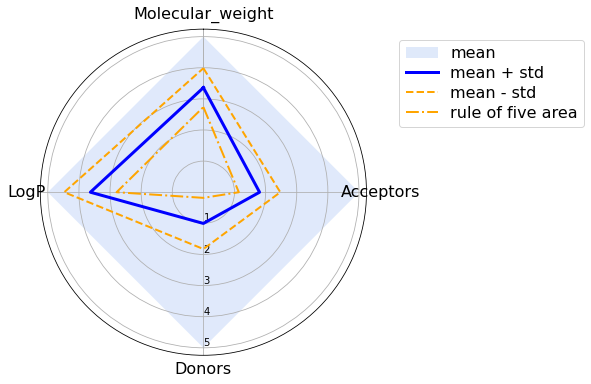

In [3]:
lip_calc.visualize(lipinski_data)

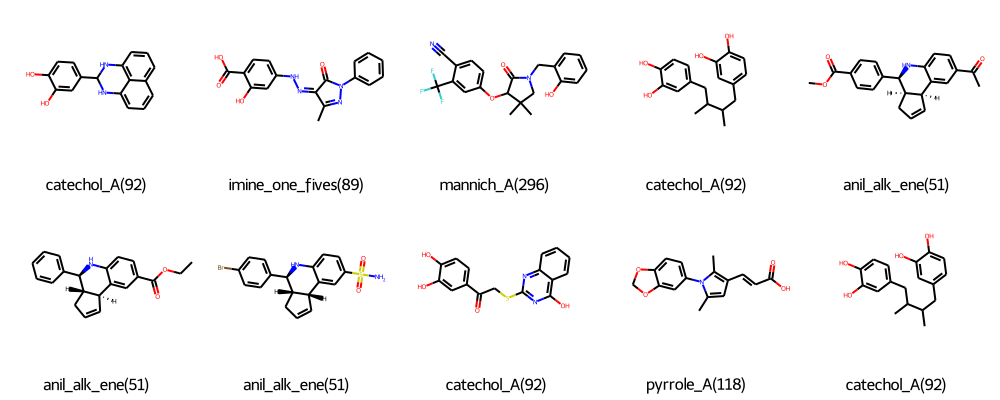

In [4]:
pains = PAINS(lipinski_data["Smile"].to_list())
pains_data = pains.get_pains()
Draw.MolsToGridImage([MolFromSmiles(smile) for smile in pains_data["smiles"][10:20]], molsPerRow=5, legends=pains_data["pains"][10:20].to_list())

PAINS free: 1152 smiles


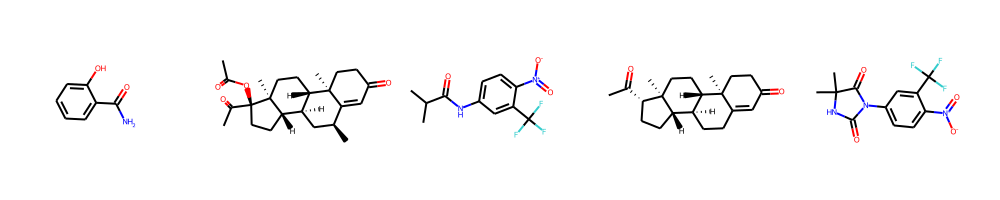

In [5]:
no_pains_smiles = pains.pains_free
print(f"PAINS free: {len(no_pains_smiles)} smiles")
Draw.MolsToGridImage([MolFromSmiles(smile) for smile in no_pains_smiles[:5]], molsPerRow=5)

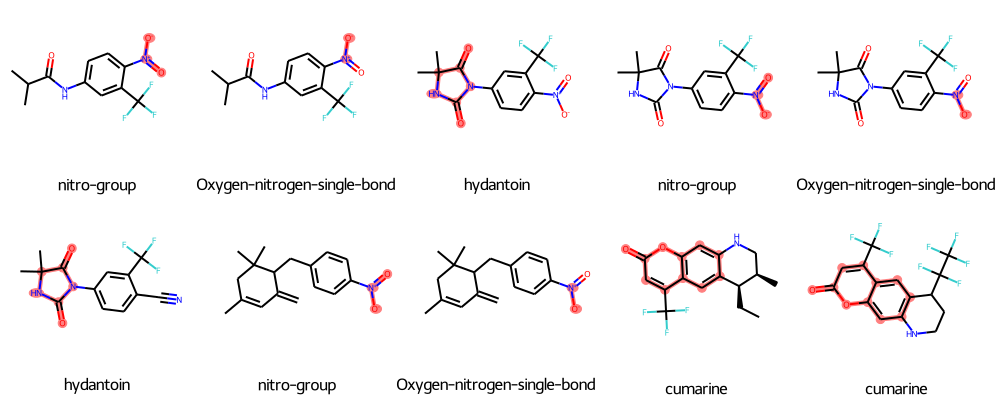

In [6]:
unwanted_searcher = UnwantedSearcher(no_pains_smiles)
unwanted_subs, clean_smiles = unwanted_searcher.get_unwanted()
unwanted_searcher.visualize(unwanted_subs[:10])

Unwanted substructures free 810 smiles:


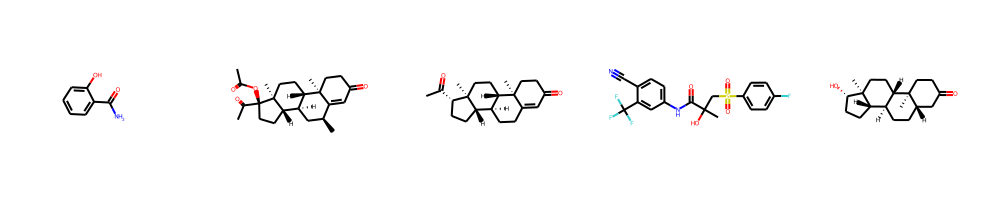

In [10]:
print(f"Unwanted substructures free {len(clean_smiles)} smiles:")
Draw.MolsToGridImage([MolFromSmiles(smile) for smile in clean_smiles[:5]], molsPerRow=5)